In [57]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = 300
# 2.1 Read file
data = pd.read_csv("../input/superstore_dataset2011-2015.csv", encoding = "ISO-8859-1")
data.shape

(51290, 24)

In [58]:
data.columns 

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [59]:
# function to call data[name_column].describe()
def describe_col(name_column):
    return data[name_column].describe()

In [60]:
# Check Is Null
data.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [61]:
# 4.4 Head 5 Rows (Default)
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [62]:
describe_col('Order ID')

count              51290
unique             25035
top       CA-2014-100111
freq                  14
Name: Order ID, dtype: object

In [63]:
describe_col('Customer ID')

count        51290
unique        1590
top       PO-18850
freq            97
Name: Customer ID, dtype: object

In [64]:
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

describe_col('Ship Date')

count                   51290
unique                   1464
top       2014-11-22 00:00:00
freq                      130
first     2011-01-02 00:00:00
last      2015-07-01 00:00:00
Name: Ship Date, dtype: object

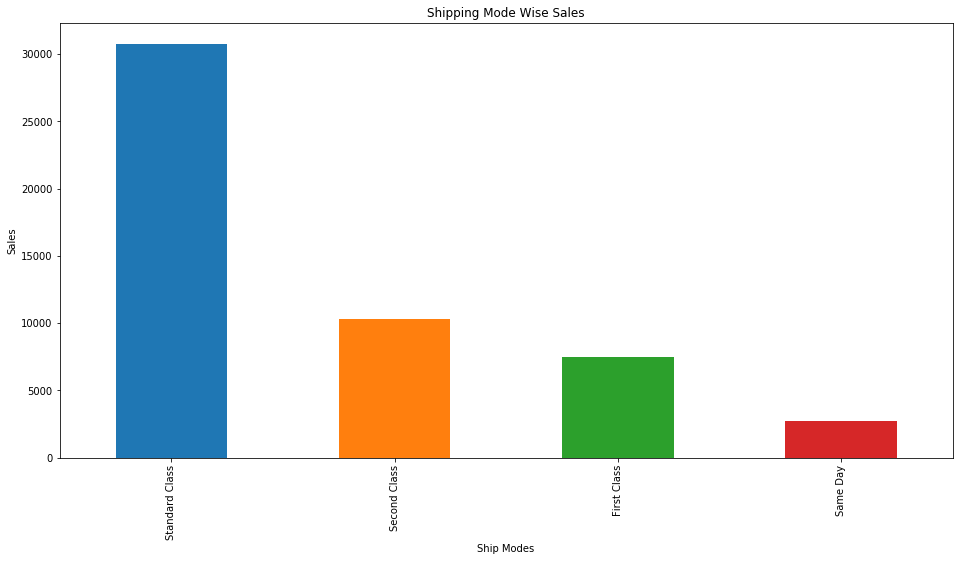

In [65]:
# Shipping Mode wise sales

plt.figure(figsize=(16,8))
data['Ship Mode'].value_counts().plot.bar()
plt.title('Shipping Mode Wise Sales')
plt.ylabel('Sales')
plt.xlabel('Ship Modes')
plt.show()

# Standard Class shipping method is the highest which is 12 times higher than same day. 
# if they decrease the price of the other shipping method that could increase the customer satisfaction


In [66]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

describe_col('Order Date')

count                   51290
unique                   1430
top       2014-06-18 00:00:00
freq                      135
first     2011-01-01 00:00:00
last      2014-12-31 00:00:00
Name: Order Date, dtype: object

In [67]:
describe_col('Ship Mode')

count              51290
unique                 4
top       Standard Class
freq               30775
Name: Ship Mode, dtype: object

In [68]:
data['Ship Mode'].unique()

array(['Standard Class', 'Second Class', 'First Class', 'Same Day'],
      dtype=object)

In [69]:
describe_col('Customer Name')
data['Customer Name'].unique()

array(['Toby Braunhardt', 'Joseph Holt', 'Annie Thurman', 'Eugene Moren',
       "Patrick O'Donnell", 'Liz Carlisle', 'David Kendrick',
       'Stephanie Phelps', 'Dave Hallsten', "Patrick O'Brill",
       'Gene Hale', 'Ralph Ritter', 'Ionia McGrath', 'Tom Prescott',
       'Todd Sumrall', 'Ruben Dartt', 'Tom Boeckenhauer',
       'Vicky Freymann', 'Katherine Hughes', 'Dave Brooks',
       'Giulietta Weimer', 'Shahid Collister', 'Bryan Spruell',
       'Chris McAfee', 'Randy Ferguson', 'Logan Haushalter', 'Lori Olson',
       'Ed Ludwig', 'Brian DeCherney', 'Jeremy Farry', 'Edward Hooks',
       'Hallie Redmond', 'Aaron Smayling', 'Benjamin Patterson',
       'Rachel Payne', 'Jennifer Braxton', 'Pete Armstrong',
       'Victoria Pisteka', 'Lynn Smith', 'Kunst Miller',
       'Katharine Harms', 'Adam Bellavance', 'Matt Hagelstein',
       'Dianna Wilson', 'Liz Thompson', 'Mike Caudle', 'Yana Sorensen',
       'Muhammed MacIntyre', 'Nick Zandusky', 'Monica Federle',
       'William Brown

In [70]:
describe_col('City')
data['City'].unique()

array(['Constantine', 'Wagga Wagga', 'Budapest', ..., 'Missoula',
       'Lannion', 'Deer Park'], dtype=object)

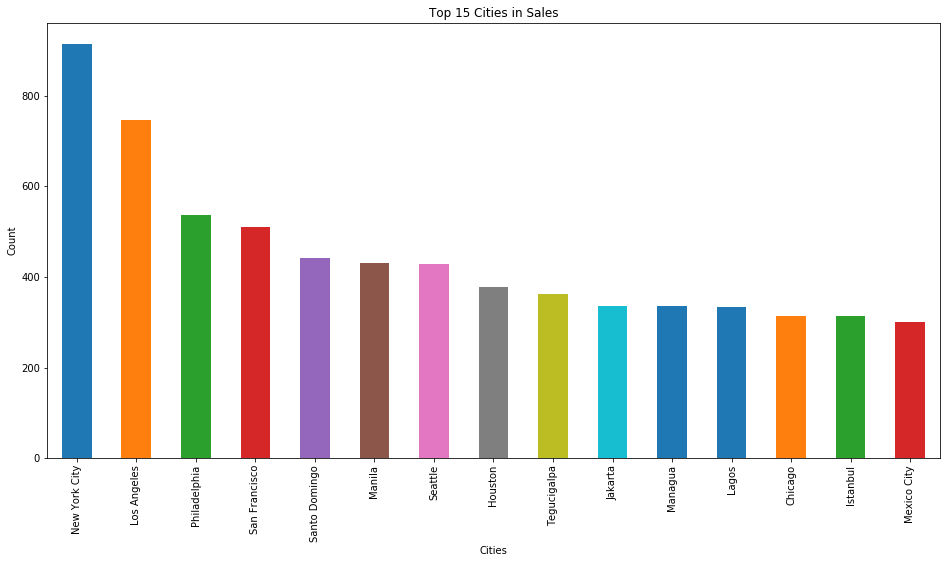

In [71]:
# Top 20 Cities in Sales
plt.figure(figsize=(16,8))
top20city = data.groupby('City')['Row ID'].count().sort_values(ascending=False)
top20city = top20city [:15]
top20city.plot(kind='bar')
plt.title('Top 15 Cities in Sales')
plt.ylabel('Count')
plt.xlabel('Cities')
plt.show()


# New York City tops all the Cities in Sales followed by LA


In [72]:
describe_col('Segment')
data['Segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

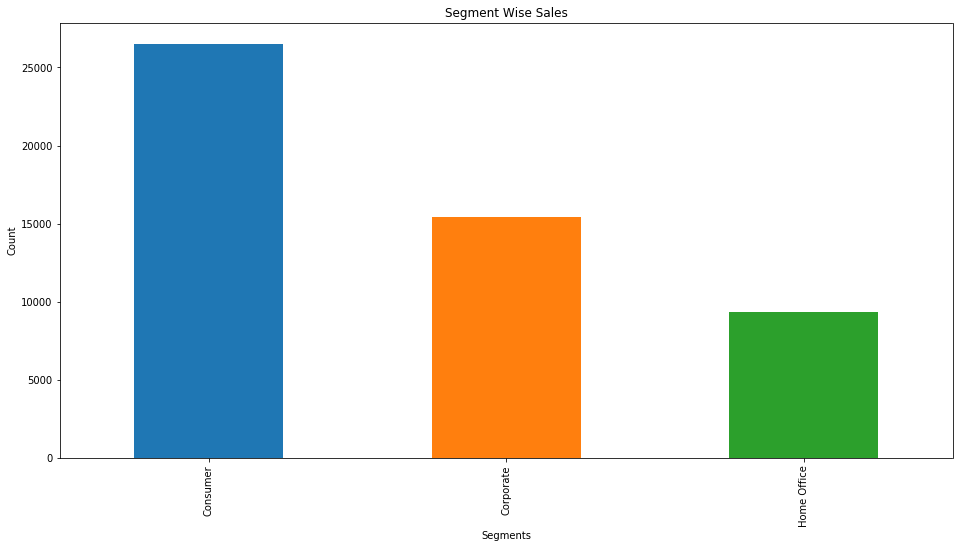

In [73]:
# Segment
plt.figure(figsize=(16,8))
data['Segment'].value_counts().plot.bar()

plt.title('Segment Wise Sales')
plt.ylabel('Count')
plt.xlabel('Segments')
plt.show()
# Consumers are the biggest buyers then corportes and then Home office
# Company should try to bring more schemes for the consumers
# to improve the corporate sales, they can bring sorporate level schemes

In [74]:
describe_col('State')
data['State'].unique()

array(['Constantine', 'New South Wales', 'Budapest', ..., 'Medea',
       'Jizzakh', 'Inhambane'], dtype=object)

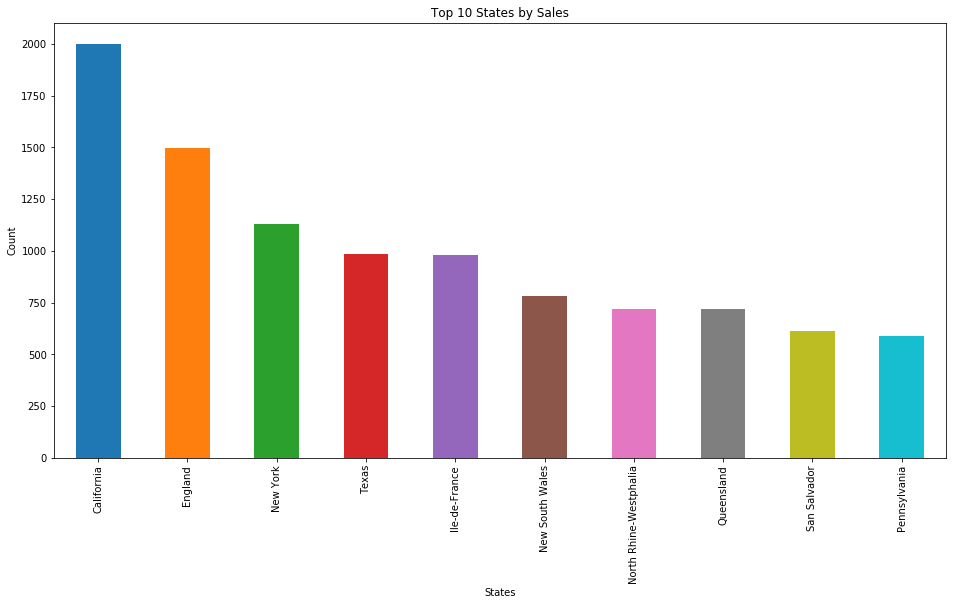

In [75]:
# Top 10 Stateswise Sales
plt.figure(figsize=(16,8))
top20states = data.groupby('State')['Row ID'].count().sort_values(ascending=False)
top20states = top20states [:10]
top20states.plot(kind='bar')
plt.title('Top 10 States by Sales')
plt.ylabel('Count')
plt.xlabel('States')
plt.show()



# California tops all the States in Sales followed by England then New York

In [76]:
describe_col('Country')
data['Country'].unique()

array(['Algeria', 'Australia', 'Hungary', 'Sweden', 'Bangladesh',
       'United States', 'Angola', 'China', 'Panama', 'Iran', 'France',
       'Italy', 'Germany', 'Canada', 'United Kingdom', 'Ukraine', 'Japan',
       'Indonesia', 'Nigeria', 'South Korea', 'Peru', 'Philippines',
       'Colombia', 'Ireland', 'Nicaragua', 'Mexico', 'Brazil', 'Turkey',
       'Spain', 'Poland', 'India', 'Somalia', 'El Salvador', 'Sudan',
       'Slovakia', 'Egypt', 'Saudi Arabia',
       'Democratic Republic of the Congo', 'Norway', 'New Zealand',
       'Kenya', 'Cuba', 'Venezuela', 'Singapore', 'Honduras', 'Tanzania',
       'Dominican Republic', 'Morocco', 'Albania', 'Belgium',
       'Afghanistan', 'Bolivia', 'Vietnam', 'Guatemala', 'Guinea-Bissau',
       'Thailand', 'Iraq', 'Myanmar (Burma)', 'Ecuador', 'Netherlands',
       'Ghana', "Cote d'Ivoire", 'Austria', 'Argentina', 'Madagascar',
       'Russia', 'South Africa', 'Bosnia and Herzegovina', 'Malaysia',
       'Romania', 'Israel', 'Burundi', '

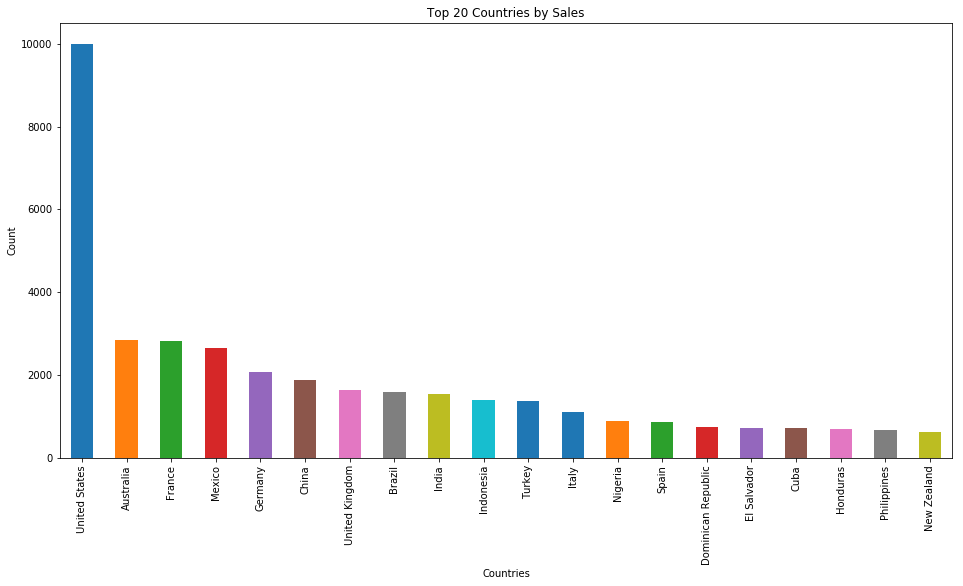

In [77]:
# Top 20 Countries in sales
plt.figure(figsize=(16,8))
top20countries = data.groupby('Country')['Row ID'].count().sort_values(ascending=False)
top20countries = top20countries [:20]
top20countries.plot(kind='bar')
plt.title('Top 20 Countries by Sales')
plt.ylabel('Count')
plt.xlabel('Countries')
plt.show()


# US tops the sales by 3 times than all the Countries


In [78]:
describe_col('Market')
data['Market'].unique()

array(['Africa', 'APAC', 'EMEA', 'EU', 'US', 'LATAM', 'Canada'],
      dtype=object)

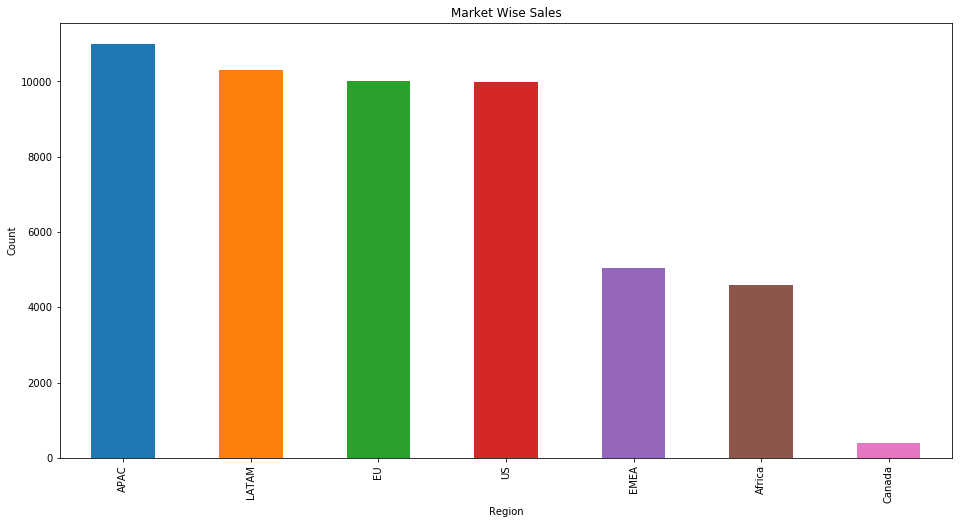

In [79]:
# Market Vs Sales
plt.figure(figsize=(16,8))
data['Market'].value_counts().plot.bar()
plt.title('Market Wise Sales')
plt.ylabel('Count')
plt.xlabel('Region')
plt.show()
# 4 regions are approximately at the top APAC, EU, US and LATM

In [80]:
describe_col('Region')
data['Region'].unique()

array(['Africa', 'Oceania', 'EMEA', 'North', 'Central Asia', 'West',
       'North Asia', 'Central', 'South', 'Canada', 'Southeast Asia',
       'East', 'Caribbean'], dtype=object)

In [81]:
describe_col('Product ID')
data['Product ID'].unique()

array(['OFF-TEN-10000025', 'OFF-SU-10000618', 'OFF-TEN-10001585', ...,
       'OFF-AP-10000437', 'OFF-FA-10002639', 'FUR-BO-10001746'],
      dtype=object)

In [82]:
describe_col('Category')
data['Category'].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

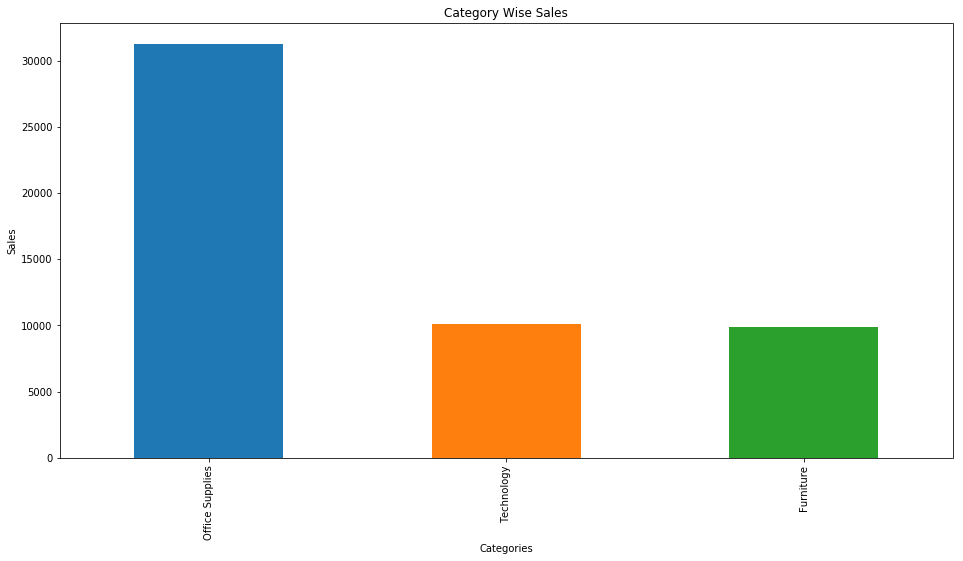

In [83]:
# Category wise
plt.figure(figsize=(16,8))
data['Category'].value_counts().plot.bar()
plt.title('Category Wise Sales')
plt.ylabel('Sales')
plt.xlabel('Categories')
plt.show()


# Office Supplies tops all the Sales in Categories



In [84]:
describe_col('Sub-Category')
data['Sub-Category'].unique()

array(['Storage', 'Supplies', 'Paper', 'Furnishings', 'Copiers',
       'Bookcases', 'Appliances', 'Art', 'Accessories', 'Binders',
       'Labels', 'Envelopes', 'Chairs', 'Machines', 'Tables', 'Phones',
       'Fasteners'], dtype=object)

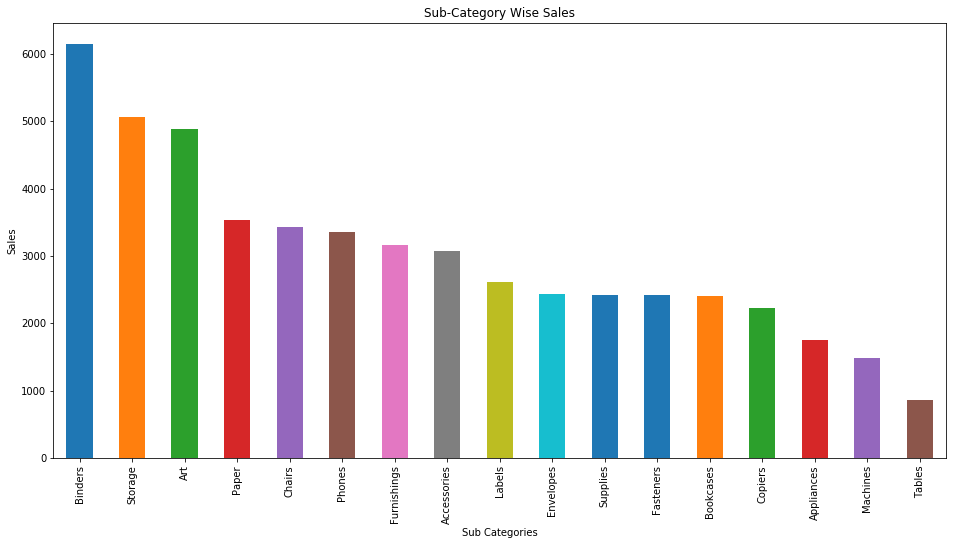

In [85]:
# Sub-Category wise sales

plt.figure(figsize=(16,8))
data['Sub-Category'].value_counts().plot.bar()
plt.title('Sub-Category Wise Sales')
plt.ylabel('Sales')
plt.xlabel('Sub Categories')
plt.show()

# Binders are in big demand - 

In [86]:
describe_col('Product Name')
data['Product Name'].unique()

array(['Tenex Lockers, Blue', 'Acme Trimmer, High Speed',
       'Tenex Box, Single Width', ...,
       'Park Ridge Embossed Executive Business Envelopes',
       'Acco Glide Clips', 'Multimedia Mailers'], dtype=object)

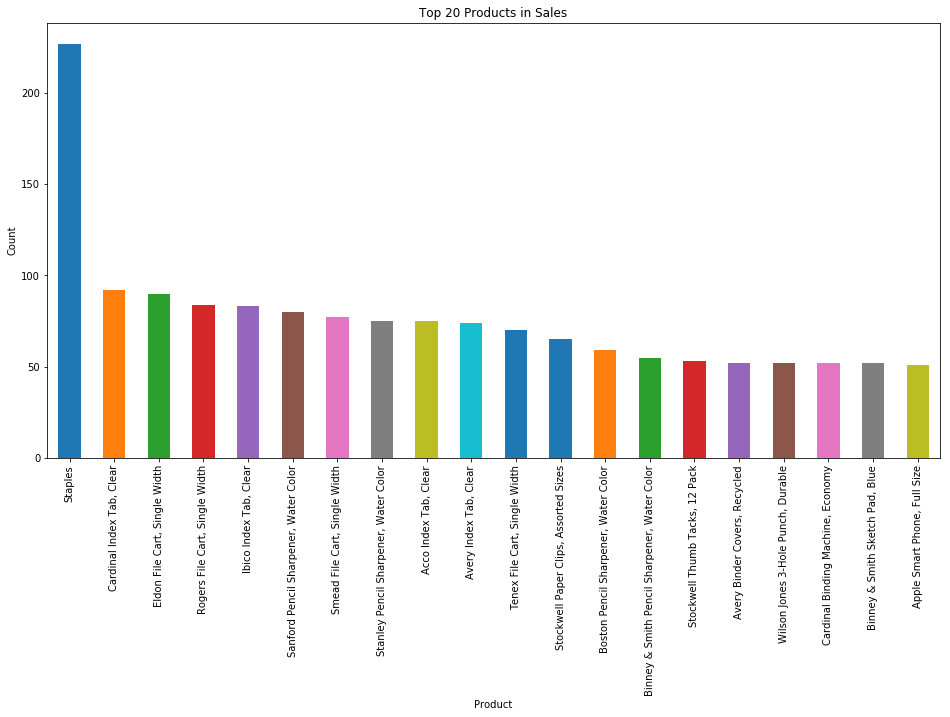

In [87]:
# Top 20 Product in Sales

plt.figure(figsize=(16,8))
top20pid = data.groupby('Product Name')['Row ID'].count().sort_values(ascending=False)
top20pid = top20pid [:20]
top20pid.plot(kind='bar')
plt.title('Top 20 Products in Sales')
plt.ylabel('Count')
plt.xlabel('Product')
plt.show()

# "Staples" seems to top all the Products in Sales by big margin

In [88]:
describe_col('Sales')

count    51290.000000
mean       246.490581
std        487.565361
min          0.444000
25%         30.758625
50%         85.053000
75%        251.053200
max      22638.480000
Name: Sales, dtype: float64

In [89]:
describe_col('Discount')

count    51290.000000
mean         0.142908
std          0.212280
min          0.000000
25%          0.000000
50%          0.000000
75%          0.200000
max          0.850000
Name: Discount, dtype: float64

In [90]:
describe_col('Profit')

count    51290.000000
mean        28.610982
std        174.340972
min      -6599.978000
25%          0.000000
50%          9.240000
75%         36.810000
max       8399.976000
Name: Profit, dtype: float64

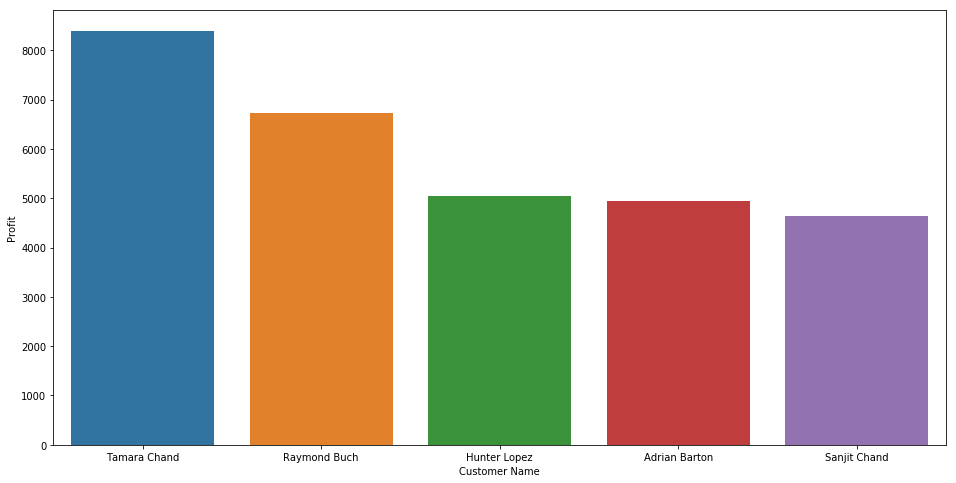

In [91]:
# Top 5 customers who earned profits


plt.figure(figsize=(16,8))
profitable = data.sort_values('Profit', ascending=False)
top20 = profitable.head(5)
top20[['Customer Name', 'Profit']]
sns.barplot(x = "Customer Name", y= "Profit", data=top20)  

# Tamara Chand tops the profitable chart

In [92]:
data['Order Priority'].unique()

array(['Medium', 'High', 'Critical', 'Low'], dtype=object)

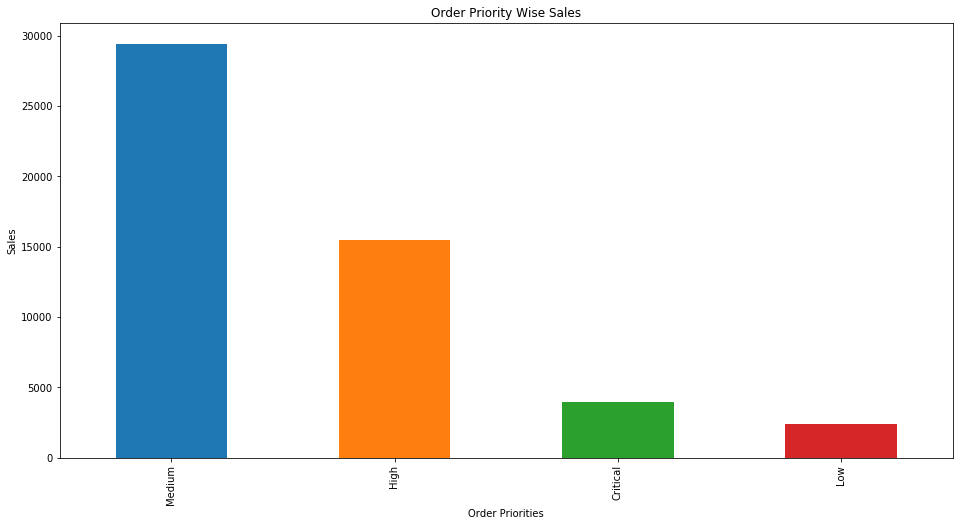

In [93]:
# Order Priority

plt.figure(figsize=(16,8))
data['Order Priority'].value_counts().plot.bar()
plt.title('Order Priority Wise Sales')
plt.ylabel('Sales')
plt.xlabel('Order Priorities')
plt.show()

# Mostly the Orders are placed with medium priority, critical are very less

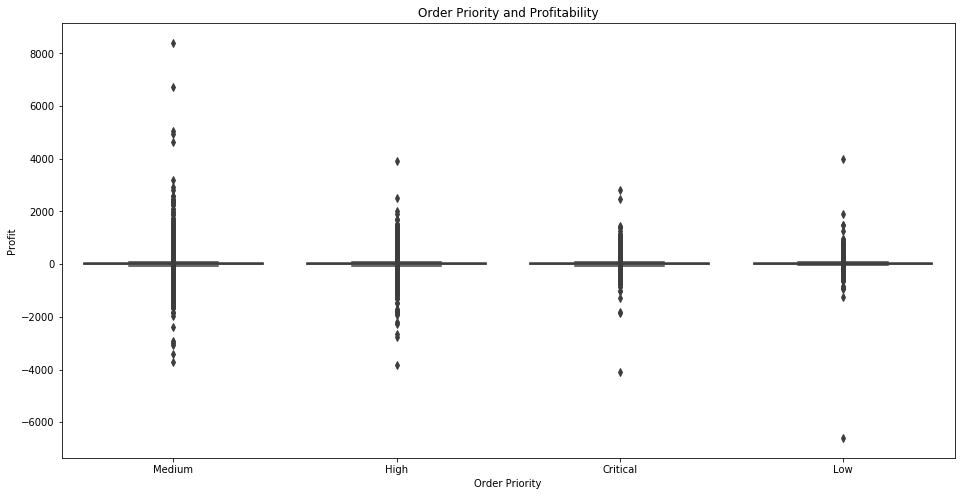

In [94]:
# Relationship of Order Priority and Profitability

plt.figure(figsize=(16,8))
sns.boxplot("Order Priority","Profit",data= data)
plt.title('Order Priority and Profitability')
plt.show()

# Profits are higher for the Medium priority

In [95]:

# Top 20 oldest Customers

data['Order Date'] = pd.to_datetime(data['Order Date'])      
top20Cust= data.sort_values(['Order Date'], ascending=False).head(20)
top20Cust.loc[:,['Customer Name']]


,Customer Name
51289,Jill Matthias
51243,Maureen Gnade
51256,Patrick O'Donnell
51255,Peter Bühler
51254,Tracy Collins
51253,Ken Lonsdale
51252,Mitch Willingham
51251,Rick Reed
51250,Maya Herman
51249,Valerie Dominguez


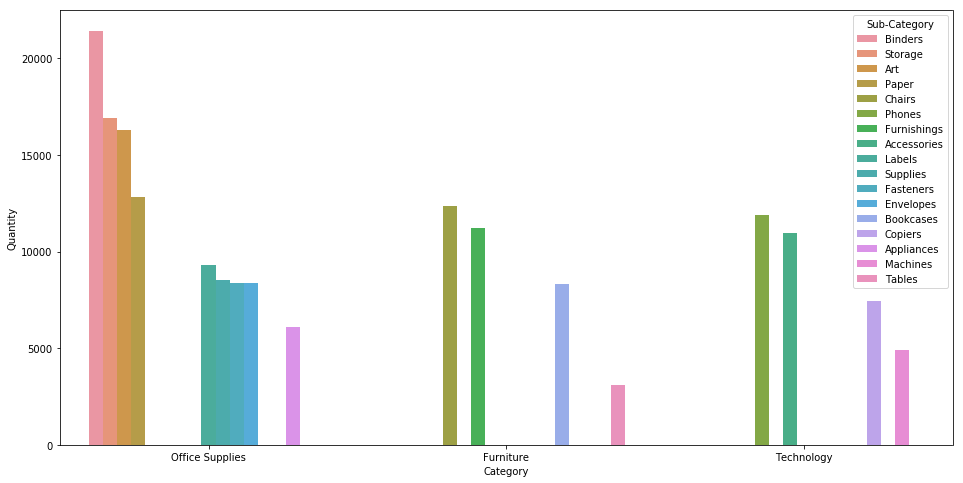

In [96]:
# Sales by product Category, Sub-category
plt.figure(figsize=(16,8))
sale_category = data.groupby(["Category","Sub-Category"])['Quantity'].aggregate(np.sum).reset_index().sort_values('Quantity',ascending = False)
sns.barplot(x = "Category", hue="Sub-Category", y= "Quantity", data=sale_category)
plt.show()

# Binders in Office Supplies tops the list.

<Figure size 1728x1080 with 0 Axes>

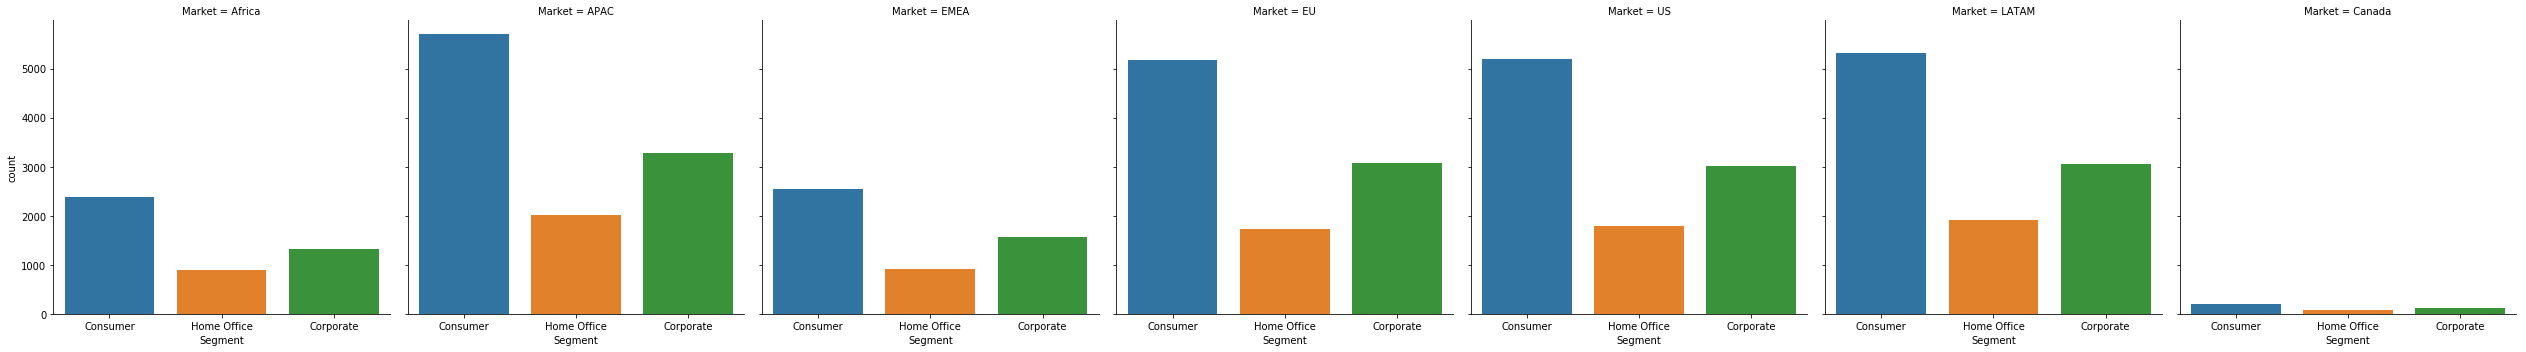

In [97]:
# Customer Segment - Market wise

plt.figure(figsize=(24,15))
sns.catplot(x="Segment", col="Market", data=data, kind="count")
plt.show()



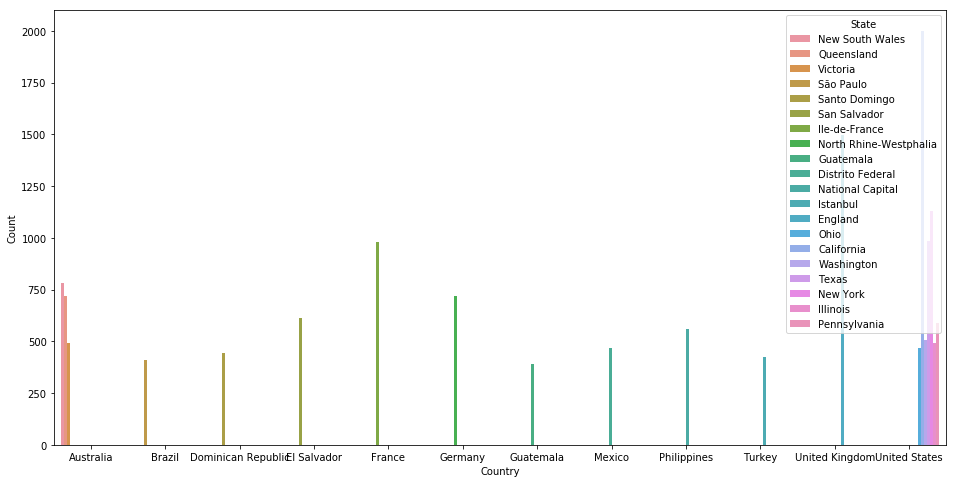

In [98]:
# Distribution of  Customers by Country & State - top 20
plt.figure(figsize=(16,8))

CusCountry = pd.DataFrame({'Count' : data.groupby(["Country","State"]).size()}).reset_index().sort_values('Count',ascending = False).head(20)
sns.barplot(x = "Country", y= "Count", hue="State", data = CusCountry.sort_values('Country'))

plt.show()


## US has the largest number of customers 
## UK has the next largest population of Customers

In [99]:
# Customers with fewer visits

Visit=data.groupby('Customer ID').apply(lambda x: pd.Series(dict(visit_count=x.shape[0])))
Visit.loc[(Visit.visit_count < 5)]

# 46Customers had very few visits....less than 5.

,visit_count
Customer ID,
BD-1500,3
BG-1035,1
CJ-2010,4
CT-1995,3
DB-3405,2
DB-3555,4
DK-2985,1
DK-3090,3
EA-4035,3
